In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mpl_toolkits.mplot3d.axes3d as Axes3D
import os

In [2]:
filename = 'Notas_vs_HorasEstudiadas.csv' # Nombre del archivo a leer

In [3]:
data = np.loadtxt('Notas_vs_HorasEstudiadas.csv', delimiter=',', skiprows=1) # Cargar los datos del archivo en un array de numpy (skiprows=1 para saltar la primera fila que contiene los nombres de las columnas)
X, y = data[:, 0], data[:, 1] # Separar las columnas en X y y es decir las horas estudiadas y las notas respectivamente

m = y.size # Número de ejemplos de entrenamiento


In [4]:
print(X) # Imprimir las horas estudiadas

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8 4.2 9.5 5.8 2.3 4.7 1.6 9.  6.2 8.1 3.9 2.2
 7.1 6.3 5.3 4.4 1.8 9.4 6.7 3.7 7.3 4.1 8.  3.1 1.3 5.7 2.8 7.9 6.6 3.6
 2.4 4.6 8.4 1.7 5.2 6.4 7.6 9.3 3.4 2.1 5.4 8.2 1.4 9.6 6.8 7.5 4.3 6.5
 8.7 3.  2.9 1.2 9.7 4.9 5.6 8.6 2.6 7.2 1.  6.  4.  5.  6.8 2.  3.  7.
 9.8 5.8 4.4 6.1 3.7 8. ]


In [5]:
print(y) # Imprimir las notas

[21. 47. 27. 75. 30. 20. 88. 60. 81. 25. 85. 62. 41. 42. 17. 95. 30. 24.
 67. 69. 30. 54. 35. 76. 86. 49. 90. 63. 23. 50. 19. 92. 68. 82. 38. 22.
 73. 66. 56. 45. 21. 93. 71. 37. 77. 44. 79. 28. 16. 59. 29. 80. 72. 36.
 26. 48. 84. 18. 53. 64. 78. 94. 33. 20. 55. 83. 15. 98. 74. 70. 43. 65.
 87. 27. 31. 14. 96. 51. 57. 89. 32. 72. 12. 61. 40. 52. 67. 18. 34. 73.
 99. 60. 44. 63. 37. 84.]


In [6]:

print("tamaño de las filas de la columna de horas estudiadas = ", X.size) #tamaño de las filas del dataset para la variable X que son las horas estudiadas
print("tamaño de las filas de la columna de notas = ", y.size) #tamaño de las columnas del dataset para la variable y que son las notas obtenidas


tamaño de las filas de la columna de horas estudiadas =  96
tamaño de las filas de la columna de notas =  96


In [7]:
#TRAZAR LOS DATOS
def plotData(x, y): #Funcion para graficar los puntos x e y (def es para definir una funcion)

    fig = plt.figure()  # abre una nueva figura con el nombre de fig

    plt.plot(x, y, 'ro', ms=10, mec='k') # Grafica los puntos x e y con un circulo rojo, ms es el tamaño del circulo y mec es el color del borde del circulo
    plt.ylabel('notas sacadas (Puntaje 1-100)') # Etiqueta del eje y
    plt.xlabel('Total de horas de estudio') # Etiqueta del eje x

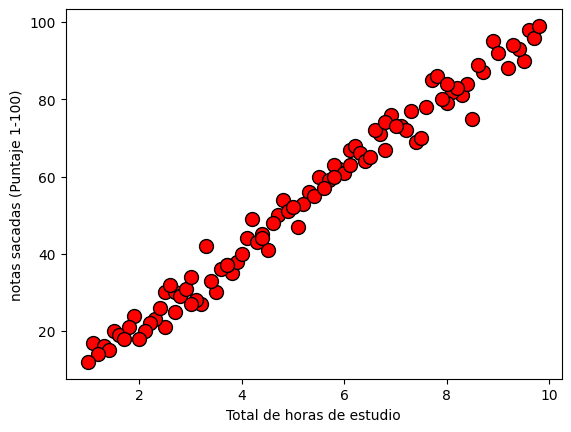

In [8]:
plotData(X, y) # Llamar a la funcion plotData con los datos de X y y

1.2 Descenso por el gradiente
1.2.1 Ecuaciones de actualización
El objetivo de la regresion lineal es minimizar la funcion de costo

J(θ)=12m∑i=1m(hθ(x(i))−y(i))2 

donde la hipotesis  hθ(x)  esta dada por el modelo lineal
hθ(x)=θTx=θ0+θ1x1 

Los parametros del modelo son los valores  θj . Estos son los valores que se ajustaran al costo minimo  J(θ) . Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
θj=θj−α1m∑i=1m(hθ(x(i))−y(i))x(i)jactualizacion simultanea θj for all j 

Con cada paso del descenso por el gradiente, los parametros  θj  son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J( θ ).

1.2.2 Implementación

In [9]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1) # Agregar una columna de unos a X para el término independiente theta_0 

In [20]:
def computeCost(X, y, theta): #Funcion para calcular el costo de la regresion lineal
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0 # inicializa el costo
    h = np.dot(X, theta) # producto punto de X y theta es la hipotesis h(x) = theta_0 + theta_1 * x
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))  # ecuación de costo
    return J # retorna el costo


In [12]:
# Cálculo del costo con theta = [0, 0]
J = computeCost(X, y,  theta=np.array([0.0, 0.0])) # Llamar a la funcion computeCost y le pasamos los datos de X, y y theta = [0, 0] (thetha 0 por que es el valor inicial)
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J) # Imprimir el costo calculado  respecto a theta = [0, 0] es decir theta_0 = 0 y theta_1 = 0
print('Valor de costo esperado (puede variar según los datos)\n') # Imprimir el valor esperado del costo

# Pruebas adicionales de la función de costos
J = computeCost(X, y, theta=np.array([-1, 2])) # Llamar a la funcion computeCost y le pasamos los datos de X, y y theta = [-1, 2] (thetha -1 por que es el valor inicial y theta 2 por que es el valor inicial)
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J) # Imprimir el costo calculado  respecto a theta = [-1, 2] es decir theta_0 = -1 y theta_1 = 2
print('Valor de costo esperado (puede variar según los datos)\n') # Imprimir el valor esperado del costo


Con theta = [0, 0] 
 Costo calculado = 1768.80
Valor de costo esperado (puede variar según los datos)

Con theta = [-1, 2]
 Costo calculado = 1188.78
Valor de costo esperado (puede variar según los datos)



El costo  J(θ)  esta parametrizado por el vector  θ , no  X  y  y . Donde hay que minimizar el valor de  J(θ)  cambiando los valores del vector  θ . Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de  J(θ)  y verificar si estos decresen en cada paso.

**Vectores y matrices en `numpy`** - Importantes notas para implementación Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [13]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X) # ecuación de actualización de theta
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history


Se inicializan los parametros  θ  con 0 y la taza de aprendizaje  α  con 0.01.

In [15]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 50
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 1.5540, 9.9083
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

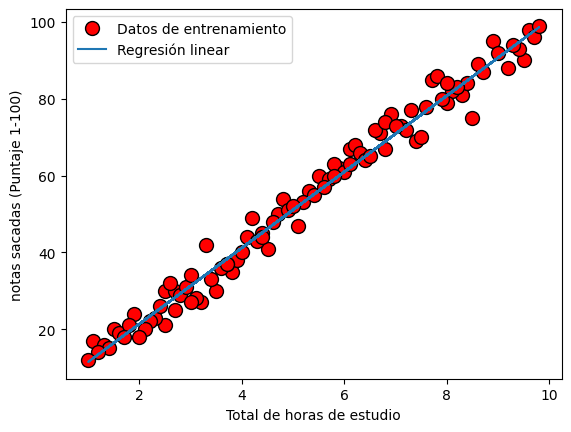

In [16]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de  θ  se utilizaran para realizar predicciones.

In [17]:

# Supongamos que quieres predecir la nota para 3.5 y 9 horas de estudio
# Predicción de notas para 3.5 horas de estudio
predict1 = np.dot([1, 3.5], theta)
print('Para 3.5 horas de estudio, se predice una nota de {:.2f}'.format(predict1))

# Predicción de notas para 9 horas de estudio
predict2 = np.dot([1, 9], theta)
print('Para 9 horas de estudio, se predice una nota de {:.2f}'.format(predict2))


Para 3.5 horas de estudio, se predice una nota de 36.23
Para 9 horas de estudio, se predice una nota de 90.73


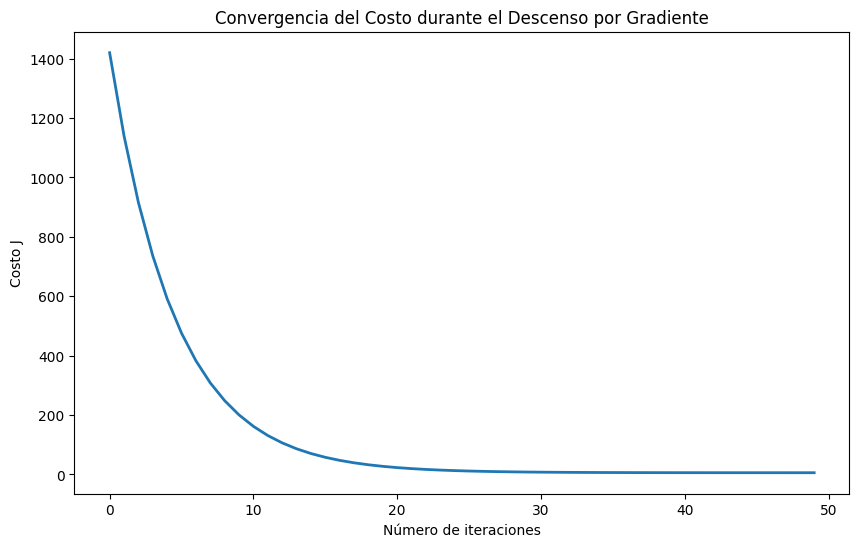

In [18]:
# Crear una figura y un eje
plt.figure(figsize=(10, 6))

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del Costo durante el Descenso por Gradiente')

# Mostrar la gráfica
plt.show()

In [19]:
from sklearn.metrics import r2_score

# Supongamos que y es el vector de valores reales y y_pred es el vector de predicciones del modelo
# y_pred = np.dot(X, theta)  # Predicciones del modelo

# Calcular el R^2
r2 = r2_score(y, np.dot(X, theta))
print('El coeficiente de determinación R^2 es {:.2f}'.format(r2))

El coeficiente de determinación R^2 es 0.98
